<a href="https://colab.research.google.com/github/swhacademy/tensorflow-guide/blob/master/2_2_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80_Cost_Function_Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math

In [0]:
# 데이터 생성
# 100개의 데이터
num_datas = 100
data = []

In [0]:
# 100개의 y = x 그래프를 기준으로 0~1까지 오차를 가진 데이터
for i in range(num_datas):
    x = np.random.normal(0.0, 3.0)
    y = x*1 + np.random.normal(0.0, 1)
    data.append([x,y])
print(data)

[[-1.5724175778705622, -1.5042406713832126], [-4.887135606598404, -5.090795490290435], [0.7850200050011078, 0.6670577726349347], [6.799729974504937, 8.731523366137068], [6.714821430871657, 7.639876750957221], [-1.3323854178398986, -1.9790311907772102], [1.4173212375856339, 1.8555317805579792], [-1.745031790054616, -0.16307498434346912], [-1.488436731321649, -2.044612341373734], [7.190456132493674, 7.814032053208071], [-2.6137642604136087, -2.643380679471315], [0.963516354040195, 1.6416787030464186], [-3.5005050944614204, -2.2571582786980824], [-1.414283816931977, -0.9980677932130124], [-3.968091631315126, -3.467820664820218], [-2.994328216750449, -1.8326228970141287], [-5.337078596393589, -5.6340962036997935], [4.498607019307945, 3.2228990585884283], [-3.221479248996566, -3.097904094623986], [0.9841004721051427, 0.6091515627328159], [3.1682454269064633, 2.3138554298190255], [0.8588025610147907, 2.762578781603736], [-3.4293719059610943, -1.7456281970527199], [-4.670571411096491, -3.9690

In [0]:
x_data = [v[0] for v in data]
y_data = [v[1] for v in data]
print(x_data)
print(y_data)

[-1.5724175778705622, -4.887135606598404, 0.7850200050011078, 6.799729974504937, 6.714821430871657, -1.3323854178398986, 1.4173212375856339, -1.745031790054616, -1.488436731321649, 7.190456132493674, -2.6137642604136087, 0.963516354040195, -3.5005050944614204, -1.414283816931977, -3.968091631315126, -2.994328216750449, -5.337078596393589, 4.498607019307945, -3.221479248996566, 0.9841004721051427, 3.1682454269064633, 0.8588025610147907, -3.4293719059610943, -4.670571411096491, -3.2905379037730684, 0.8296834311494048, 0.9937692612219865, 0.07687254131135741, 0.5892179795861727, -2.1799625977964103, -0.16375236992704298, -1.024837790210446, 0.8846962755459686, 1.1151879318723783, -1.467910895943982, -4.34064886950855, 0.9258273491458513, -5.78968233429884, -0.7829913529029062, 1.4236658745137676, 3.307978007580005, 3.2069142093377923, -1.0563926565687416, 5.039867699194716, -5.436631967656, -4.834430203749555, 0.8479608618779779, 3.4498145205071635, 0.4461434455366816, -4.740258023810615,

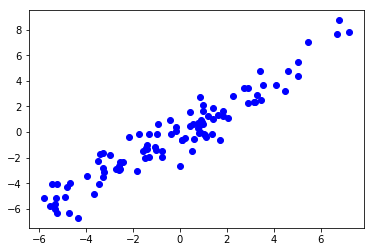

In [0]:
plt.plot(x_data,y_data,'bo')
plt.show()

In [0]:
# Tensorflow를 이용한 작업
# 선형 회귀
# y = W * x + b
# W : weight > 초기화를 -1.0과 1.0 사이의 값으로 랜덤하게 정한다
# b : bias > 초기값은 0
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# cost or loss function = 오차의 RMS
# optimizer = GD Optimizer
# 여기서 0.01은 학습률
# 너무 작으면 느리게 학습하고
# 너무 크면 발산해 버림
loss = tf.reduce_mean(tf.square(y- y_data))
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

In [0]:
# Tensorflow 세션 실행
sess = tf.Session()
sess.run(tf.global_variables_initializer())

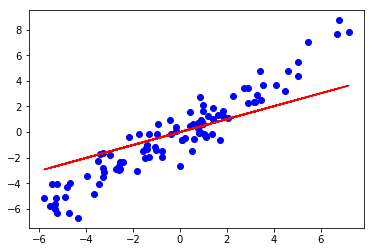

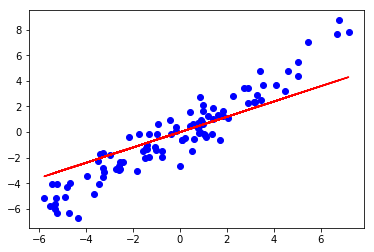

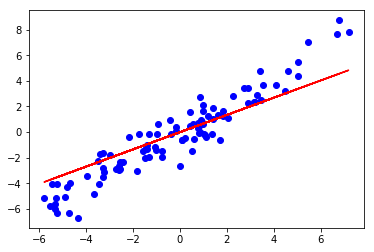

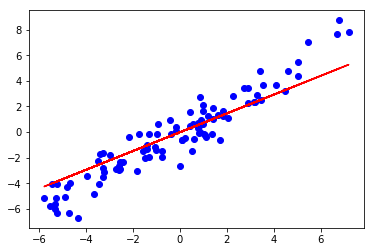

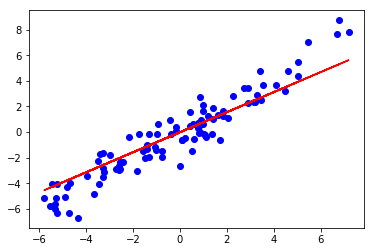

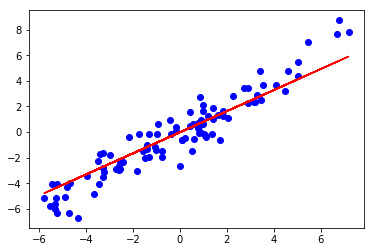

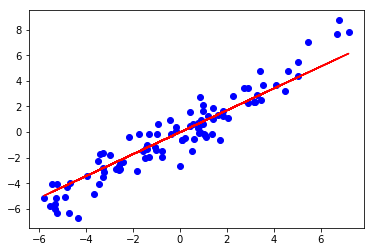

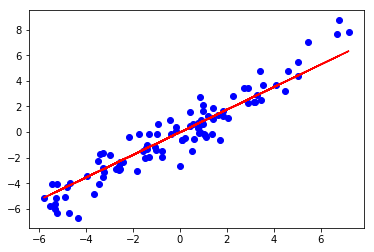

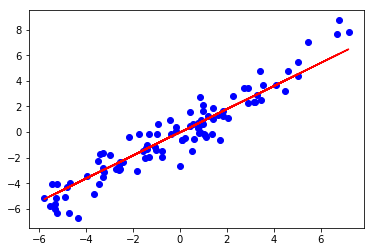

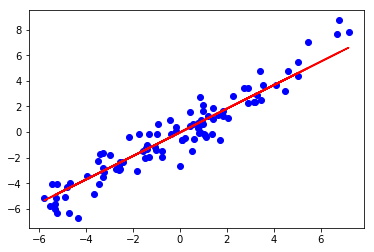

In [0]:
# 10번의 학습을 반복
# 각 학습마다 결과를 출력해 본다
for step in range(10):
    sess.run(train)
    plt.plot(x_data, y_data, 'bo')
    plt.plot(x_data, sess.run(W) * x_data + sess.run(b), 'r')
    # plt.legend()
    plt.show()